## Import data and packages

In [ ]:
import pandas as pd
import seaborn as sns

data=pd.read_excel('C:/Users/Hp/Desktop/Diabetes_Classification.xlsx')
data.head()

,Patient number,Cholesterol,Glucose,HDL Chol,Chol/HDL ratio,Age,Gender,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Waist/hip ratio,Diabetes
0,1,193,77,49,3.9,19,female,61,119,22.5,118,70,32,38,0.84,No diabetes
1,2,146,79,41,3.6,19,female,60,135,26.4,108,58,33,40,0.83,No diabetes
2,3,217,75,54,4.0,20,female,67,187,29.3,110,72,40,45,0.89,No diabetes
3,4,226,97,70,3.2,20,female,64,114,19.6,122,64,31,39,0.79,No diabetes
4,5,164,91,67,2.4,20,female,70,141,20.2,122,86,32,39,0.82,No diabetes


Show all variables in the data. The variables are identified as shown below:

1. `Patient number` identifies patients by number
2. `Cholestrol` indicates total cholesterol
3. `Glucose` indicates fasting blood sugar
4. `HDL` refers to good cholesterol 
5. `Chol/HDL Ratio` is the ratio of total cholesterol to good cholesterol(HDL). Desirable result is <5 
6. `Age` of all adult African American
7. `Gender` which includes 162 males, 228 females
8. `Height` measured in inches
9. `Weight` measured in pound(lbs)
10. `BMI` is (703 x weight)/2(height)     #lbs,inches
11. `Systolic BP` refers to the upper number of blood pressure
12. `Diastolic BP` refers to the lower number of blood pressure
13. `Waist` measured in inches
14. `Hip` measured in inches
15. `Waist/Hip Ratio` is the ratio of a possibly stronger risk factor for heart disease than BMI
16. `Diabetes`; number of people with diabetes: Yes (60), No (330)

Check for null data in variables

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Patient number   390 non-null    int64  
 1   Cholesterol      390 non-null    int64  
 2   Glucose          390 non-null    int64  
 3   HDL Chol         390 non-null    int64  
 4   Chol/HDL ratio   390 non-null    float64
 5   Age              390 non-null    int64  
 6   Gender           390 non-null    object 
 7   Height           390 non-null    int64  
 8   Weight           390 non-null    int64  
 9   BMI              390 non-null    float64
 10  Systolic BP      390 non-null    int64  
 11  Diastolic BP     390 non-null    int64  
 12  waist            390 non-null    int64  
 13  hip              390 non-null    int64  
 14  Waist/hip ratio  390 non-null    float64
 15  Diabetes         390 non-null    object 
dtypes: float64(3), int64(11), object(2)
memory usage: 48.9+ KB


Change the data type for `Age` to minimize the memory usage

In [ ]:
data=data.astype({'Age': 'int32'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Patient number   390 non-null    int64  
 1   Cholesterol      390 non-null    int64  
 2   Glucose          390 non-null    int64  
 3   HDL Chol         390 non-null    int64  
 4   Chol/HDL ratio   390 non-null    float64
 5   Age              390 non-null    int32  
 6   Gender           390 non-null    object 
 7   Height           390 non-null    int64  
 8   Weight           390 non-null    int64  
 9   BMI              390 non-null    float64
 10  Systolic BP      390 non-null    int64  
 11  Diastolic BP     390 non-null    int64  
 12  waist            390 non-null    int64  
 13  hip              390 non-null    int64  
 14  Waist/hip ratio  390 non-null    float64
 15  Diabetes         390 non-null    object 
dtypes: float64(3), int32(1), int64(10), object(2)
memory usage: 47

Define function to count the proportion of categorical data 

In [ ]:
def value_counts(data, col, style=True):
    table = data[col].value_counts().rename_axis('Value').reset_index(name='Count')
    table['Percentage'] = table['Count'] / table['Count'].sum(axis=0)
    
    if style:
        table = table.style.format({'Count': '{:,}', 'Percentage': '{:.2%}'}).hide_index()
        
    return table

Take a look at the proportion of categorical data

In [ ]:
value_counts(data, 'Gender')

Value,Count,Percentage
female,228,58.46%
male,162,41.54%


In [ ]:
value_counts(data, 'Diabetes')

Value,Count,Percentage
No diabetes,330,84.62%
Diabetes,60,15.38%


Convert `Diabetes` and `Gender` into binary data (No diabetes and female = 0, Diabetes and male = 1)

In [ ]:
values1={'No diabetes':0,'Diabetes':1} 
data['Diabetes']=data['Diabetes'].replace(values1)
values2={'female':0,'male':1} 
data['Gender']=data['Gender'].replace(values2)
data.head()

,Patient number,Cholesterol,Glucose,HDL Chol,Chol/HDL ratio,Age,Gender,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Waist/hip ratio,Diabetes
0,1,193,77,49,3.9,19,0,61,119,22.5,118,70,32,38,0.84,0
1,2,146,79,41,3.6,19,0,60,135,26.4,108,58,33,40,0.83,0
2,3,217,75,54,4.0,20,0,67,187,29.3,110,72,40,45,0.89,0
3,4,226,97,70,3.2,20,0,64,114,19.6,122,64,31,39,0.79,0
4,5,164,91,67,2.4,20,0,70,141,20.2,122,86,32,39,0.82,0


Drop the `Patient number` because it is not relevant to use 

In [ ]:
data.drop(['Patient number'], axis=1, inplace=True)

Show statistics of the data

In [ ]:
data.describe().round(3)

,Cholesterol,Glucose,HDL Chol,Chol/HDL ratio,Age,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Waist/hip ratio
count,390.000,390.000,390.000,390.000,390.000,390.000,390.000,390.000,390.000,390.000,390.000,390.000,390.000
mean,207.231,107.338,50.267,4.525,46.774,65.951,177.408,28.776,137.133,83.290,37.869,42.992,0.881
std,44.666,53.798,17.279,1.737,16.436,3.919,40.408,6.601,22.860,13.498,5.761,5.664,0.073
min,78.000,48.000,12.000,1.500,19.000,52.000,99.000,15.200,90.000,48.000,26.000,30.000,0.680
25%,179.000,81.000,38.000,3.200,34.000,63.000,150.250,24.100,122.000,75.000,33.000,39.000,0.830
50%,203.000,90.000,46.000,4.200,44.500,66.000,173.000,27.800,136.000,82.000,37.000,42.000,0.880
75%,229.000,107.750,59.000,5.400,60.000,69.000,200.000,32.275,148.000,90.000,41.000,46.000,0.930
max,443.000,385.000,120.000,19.300,92.000,76.000,325.000,55.800,250.000,124.000,56.000,64.000,1.140


Import a new package and define **target_boxplot** to visualize the data

In [ ]:
import matplotlib.pyplot as plt
def target_boxplot(data, variable, target='Target', plotsize=(8, 8), colors=['yellow', 'purple'], labels=['No', 'Yes'], limits=None):
    fig, ax = plt.subplots(figsize=plotsize)
    
    bp = sns.boxplot(x=target, y=variable, data=data, showmeans=True, meanline=True, 
                     palette=colors, width=0.3,
                     flierprops=dict(marker='o', markerfacecolor='red', markeredgecolor='white', alpha=0.5),
                     meanprops=dict(linestyle='-', linewidth=2, color='orange'),
                     medianprops=dict(linestyle='-', linewidth=2, color='white'), 
                     boxprops=dict(linewidth=0, alpha=0.7))
    
    bp.set(xticklabels=labels, ylim=limits)
    
    plt.show()

Make `Diabetes` as the response variable while the others (except `Gender` because it is categorical variable) as the independent variable. We use boxplot to see the difference of mean between diabetics and non-diabetics people based on independent variables.

<Figure size 432x288 with 0 Axes>

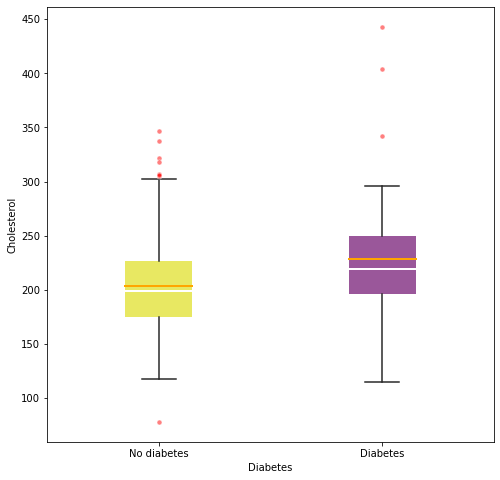

<Figure size 432x288 with 0 Axes>

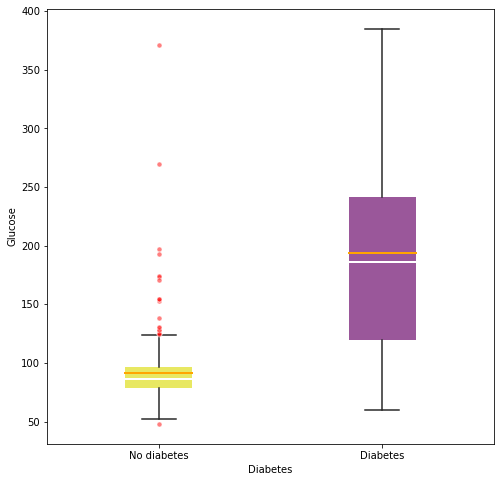

<Figure size 432x288 with 0 Axes>

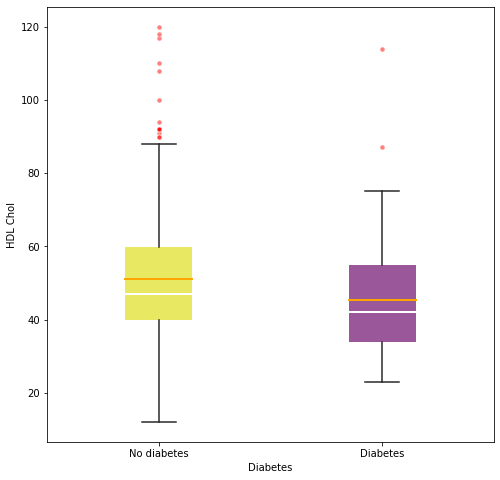

<Figure size 432x288 with 0 Axes>

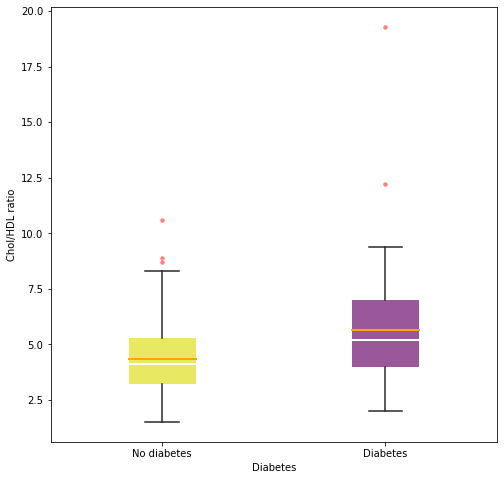

<Figure size 432x288 with 0 Axes>

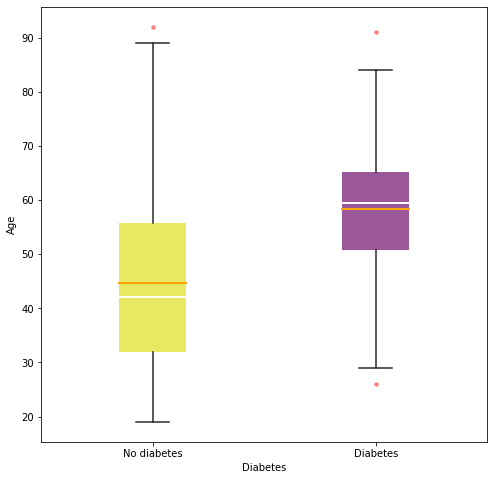

<Figure size 432x288 with 0 Axes>

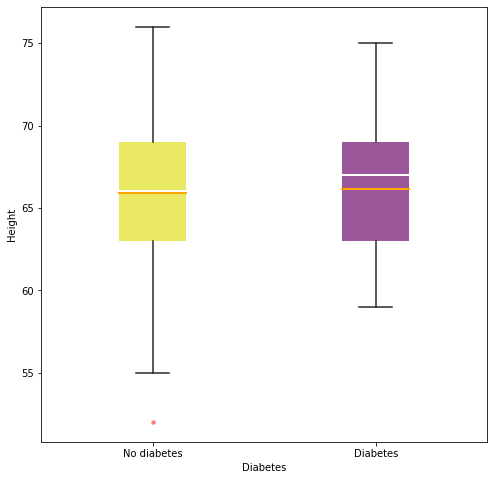

<Figure size 432x288 with 0 Axes>

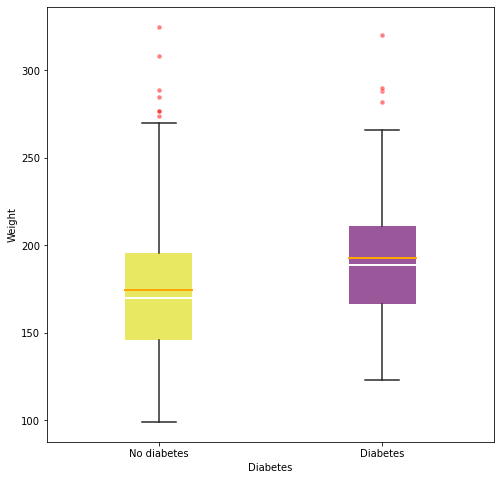

<Figure size 432x288 with 0 Axes>

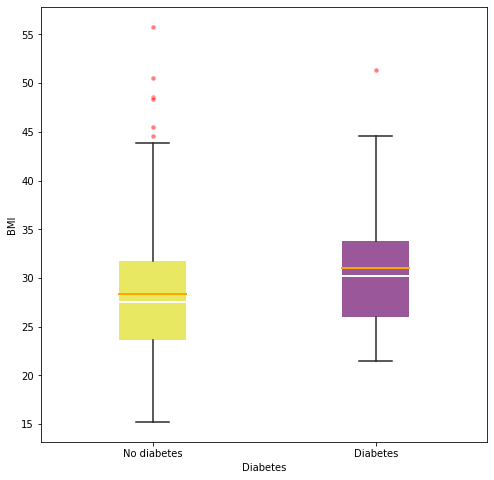

<Figure size 432x288 with 0 Axes>

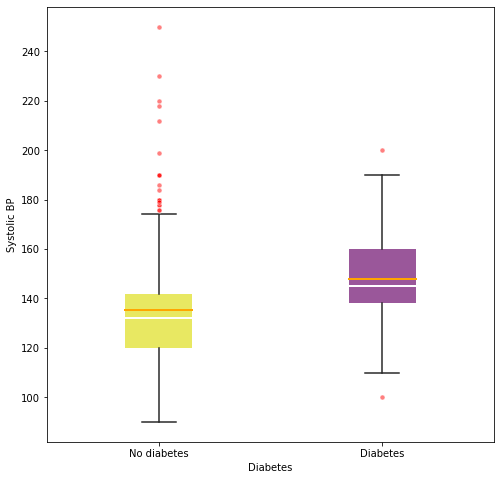

<Figure size 432x288 with 0 Axes>

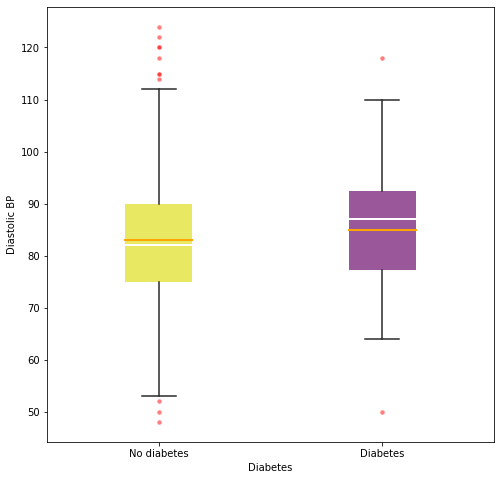

<Figure size 432x288 with 0 Axes>

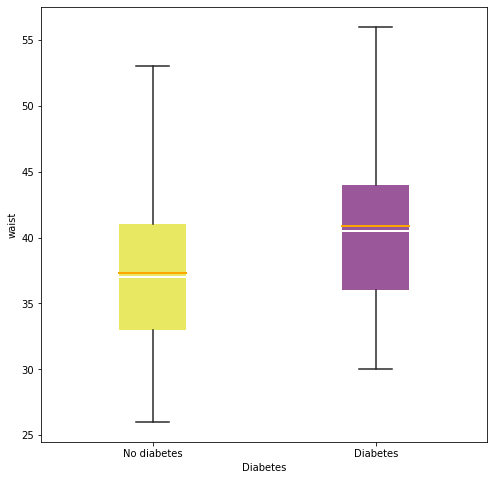

<Figure size 432x288 with 0 Axes>

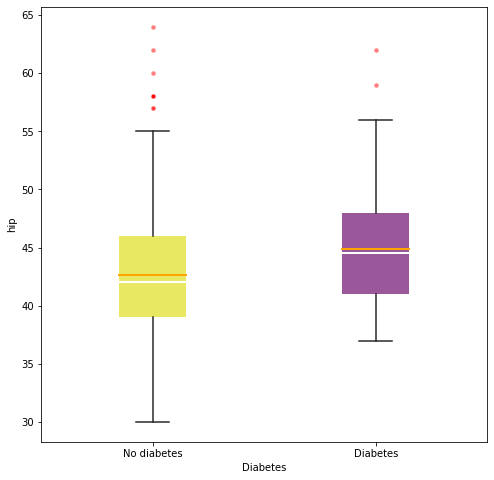

<Figure size 432x288 with 0 Axes>

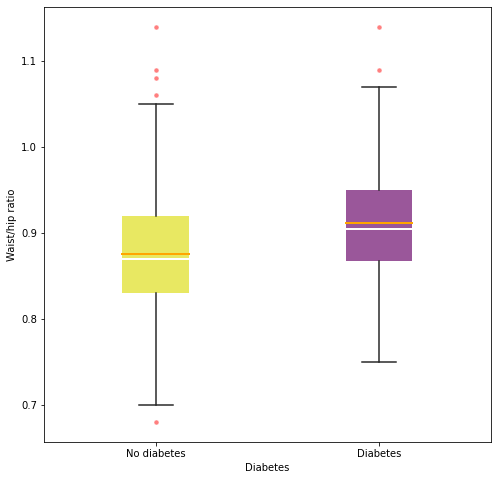

In [ ]:
response = 'Diabetes'
for var in ['Cholesterol', 'Glucose', 'HDL Chol', 'Chol/HDL ratio', 'Age', 'Height', 'Weight', 'BMI', 'Systolic BP', 'Diastolic BP', 'waist', 'hip', 'Waist/hip ratio']:
    plt.figure()
    target_boxplot(data, var, target=response, labels=['No diabetes', 'Diabetes'])

### Correlation

Show the correlation heatmap to see how significant between variables 

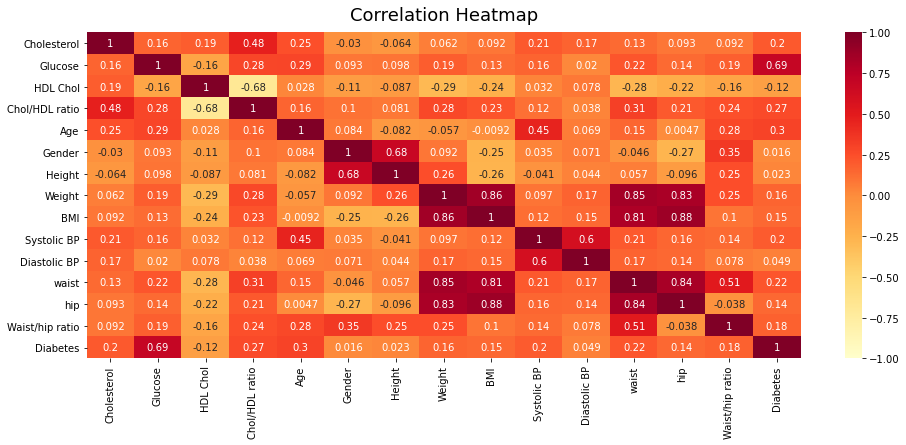

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='YlOrRd')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

To drop the variables, we need to compare the variables with correlation score above 0.7, and then compare it with `Diabetes`

In [ ]:
data.drop(['hip', 'BMI', 'Weight'], axis=1, inplace=True)

In [ ]:
data2=data.astype({'Diabetes':'category'})
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Cholesterol      390 non-null    int64   
 1   Glucose          390 non-null    int64   
 2   HDL Chol         390 non-null    int64   
 3   Chol/HDL ratio   390 non-null    float64 
 4   Age              390 non-null    int32   
 5   Gender           390 non-null    int64   
 6   Height           390 non-null    int64   
 7   Systolic BP      390 non-null    int64   
 8   Diastolic BP     390 non-null    int64   
 9   waist            390 non-null    int64   
 10  Waist/hip ratio  390 non-null    float64 
 11  Diabetes         390 non-null    category
dtypes: category(1), float64(2), int32(1), int64(8)
memory usage: 32.6 KB


Import ppscore to see whether between the independent variables have high correlation or not

In [ ]:
import ppscore as pps

pps_mtx = pps.matrix(data2)

In [ ]:
pps_predictors2target = pps_mtx[(pps_mtx['x'] != 'Diabetes') & (pps_mtx['y'] == 'Diabetes')].copy()
pps_predictors2target.sort_values(by='ppscore', ascending=False, inplace=True)
pps_predictors2target.reset_index(drop=True, inplace=True)
pps_predictors2target

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Glucose,Diabetes,0.434266,classification,True,weighted F1,0.775641,0.873073,DecisionTreeClassifier()
1,Cholesterol,Diabetes,0.088439,classification,True,weighted F1,0.775641,0.795483,DecisionTreeClassifier()
2,waist,Diabetes,0.052491,classification,True,weighted F1,0.775641,0.787418,DecisionTreeClassifier()
3,Chol/HDL ratio,Diabetes,0.022225,classification,True,weighted F1,0.775641,0.780627,DecisionTreeClassifier()
4,HDL Chol,Diabetes,0.019620,classification,True,weighted F1,0.775641,0.780043,DecisionTreeClassifier()
5,Waist/hip ratio,Diabetes,0.009727,classification,True,weighted F1,0.775641,0.777823,DecisionTreeClassifier()
6,Age,Diabetes,0.000000,classification,True,weighted F1,0.775641,0.765783,DecisionTreeClassifier()
7,Gender,Diabetes,0.000000,classification,True,weighted F1,0.775641,0.775636,DecisionTreeClassifier()
8,Height,Diabetes,0.000000,classification,True,weighted F1,0.775641,0.775636,DecisionTreeClassifier()
9,Systolic BP,Diabetes,0.000000,classification,True,weighted F1,0.775641,0.767134,DecisionTreeClassifier()


In [ ]:
score=pps_mtx.loc[(pps_mtx['ppscore'] > 0) & (pps_mtx['ppscore'] < 1)]
score=score[['x','y','ppscore']]
score.sort_values(by='ppscore',ascending=False,ignore_index=True)

,x,y,ppscore
0,Height,Gender,0.464528
1,Glucose,Diabetes,0.434266
2,Chol/HDL ratio,HDL Chol,0.362831
3,HDL Chol,Chol/HDL ratio,0.338472
4,Gender,Height,0.322389
5,Diabetes,Glucose,0.206023
6,Waist/hip ratio,waist,0.156070
7,Systolic BP,Diastolic BP,0.144289
8,Diastolic BP,Systolic BP,0.134707
9,Cholesterol,Diabetes,0.088439


### Multicollinearity

Show the relationship between the independent variable with VIF values

In [ ]:
def VIF():
    target='Diabetes'
    features = [col for col in data.columns if col not in target]


    X_train = data[features]
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    model_variables = X_train.columns
    vif_values = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif = pd.DataFrame({'Variable': model_variables, 'VIF': vif_values})
    vif.sort_values(by='VIF',inplace=True)
    return (vif)

In [ ]:
def drop(var):
    data.drop([var],axis=1,inplace=True)
    VIF()
    return(VIF())

Drop the variables with the highest VIF value one by one

In [ ]:
VIF()

,Variable,VIF
5,Gender,2.270630
1,Glucose,5.980730
4,Age,14.925412
2,HDL Chol,52.838712
3,Chol/HDL ratio,54.403171
8,Diastolic BP,69.346556
9,waist,76.037883
7,Systolic BP,80.165642
0,Cholesterol,87.157728
6,Height,180.284833


In [ ]:
drop('Waist/hip ratio')

,Variable,VIF
5,Gender,2.246531
1,Glucose,5.962819
4,Age,14.017433
2,HDL Chol,51.216506
3,Chol/HDL ratio,52.962812
9,waist,54.747739
8,Diastolic BP,69.272056
7,Systolic BP,80.104134
0,Cholesterol,86.036688
6,Height,115.366887


In [ ]:
drop('Height')

,Variable,VIF
5,Gender,1.791857
1,Glucose,5.961355
4,Age,13.844028
2,HDL Chol,35.602974
8,waist,38.826097
3,Chol/HDL ratio,42.494889
7,Diastolic BP,66.880482
0,Cholesterol,78.563239
6,Systolic BP,79.059035


In [ ]:
drop('Systolic BP')

,Variable,VIF
5,Gender,1.787842
1,Glucose,5.956310
4,Age,10.613344
2,HDL Chol,35.358234
6,Diastolic BP,35.908078
7,waist,37.865224
3,Chol/HDL ratio,42.290251
0,Cholesterol,78.460281


In [ ]:
drop('Cholesterol')

,Variable,VIF
4,Gender,1.766010
0,Glucose,5.947886
3,Age,10.570904
1,HDL Chol,12.801254
2,Chol/HDL ratio,13.701050
5,Diastolic BP,35.879863
6,waist,37.432794


In [ ]:
drop('waist')

,Variable,VIF
4,Gender,1.755388
0,Glucose,5.800987
3,Age,10.397683
2,Chol/HDL ratio,11.197225
1,HDL Chol,12.004777
5,Diastolic BP,26.668741


In [ ]:
drop('Diastolic BP')

,Variable,VIF
4,Gender,1.728730
1,HDL Chol,5.185444
0,Glucose,5.788923
2,Chol/HDL ratio,6.496076
3,Age,10.283445


In [ ]:
drop('Age')

,Variable,VIF
3,Gender,1.717542
1,HDL Chol,3.438510
2,Chol/HDL ratio,5.088340
0,Glucose,5.366946


## Naive Bayes

Drop `Diabetes` as independent variable and define it as dependent variable. Then split the proportion for train and test data

In [ ]:
X = data.drop(['Diabetes'], axis=1)
y = data['Diabetes']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

Show how much data used in train data and test data

In [ ]:
X_train.shape, X_test.shape

((273, 4), (117, 4))

Import package for Gaussian Naive Bayes method

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

Show the value of `Diabetes` prediction 

In [ ]:
NB=pd.DataFrame(gnb.predict(X_test),columns=['Diabetes_Predicted_NB'])
NB.head()

,Diabetes_Predicted_NB
0,0
1,0
2,0
3,0
4,0


Import packages and define metric score such as precision, sensitivity, accuracy, and F1 score

In [ ]:
from sklearn import metrics
import numpy as np
def metric_score(y,y_pred):
    precision=metrics.precision_score(y, y_pred)
    sensitivity=metrics.recall_score(y, y_pred)
    accuracy=metrics.accuracy_score(y,y_pred)
    f1_score=metrics.f1_score(y, y_pred)
    metric_array = np.array([['Accuracy', accuracy],
                           ['Precision', precision], ['Sensitivity', sensitivity],['F1 Score', f1_score]])
    metric_score = pd.DataFrame(metric_array, columns=['Metric', 'Score'])
    return(metric_score)

Show the value of the metric score to see whether if the model is good enough

In [ ]:
metric_score(y_test,NB['Diabetes_Predicted_NB'])

,Metric,Score
0,Accuracy,0.8974358974358975
1,Precision,0.8571428571428571
2,Sensitivity,0.5454545454545454
3,F1 Score,0.6666666666666665


In [ ]:
y_pred_train = gnb.predict(X_train)

Check the value of the metric score below with above to see whether if the model is overfitting nor underfitting

In [ ]:
metric_score(y_train,y_pred_train)

,Metric,Score
0,Accuracy,0.9413919413919414
1,Precision,0.8235294117647058
2,Sensitivity,0.7368421052631579
3,F1 Score,0.7777777777777778


Compare the prediction and actual data

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,NB['Diabetes_Predicted_NB'])
cm_df=pd.DataFrame(cm,columns=['No Diabetes','Diabetes'],index=['No Diabetes', 'Diabetes'])
cm_df

,No Diabetes,Diabetes
No Diabetes,93,2
Diabetes,10,12


<AxesSubplot:>

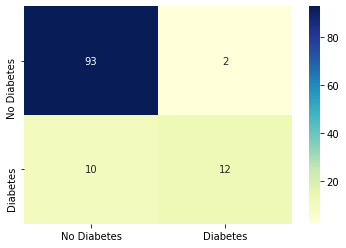

In [ ]:
sns.heatmap(cm_df, annot=True, fmt='d', cmap='YlGnBu')

Reprocessing the data 30 times to make sure that the metric score is valid

In [ ]:
def split(data):
    prec=0
    sens=0
    acc=0
    f1=0
    
    for i in range (30):
        X = data.drop(['Diabetes'], axis=1)
        y = data['Diabetes']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

        gnb = GaussianNB()
        gnb.fit(X_train, y_train)

        NB=pd.DataFrame(gnb.predict(X_test))
        NB.columns=['Diabetes_Predicted_NB']

        precision=metrics.precision_score(y_test, NB['Diabetes_Predicted_NB'])
        prec+=precision
        sensitivity=metrics.recall_score(y_test, NB['Diabetes_Predicted_NB'])
        sens+=sensitivity
        accuracy=metrics.accuracy_score(y_test,NB['Diabetes_Predicted_NB'])
        acc+=accuracy
        f1_score=metrics.f1_score(y_test, NB['Diabetes_Predicted_NB'])
        f1+=f1_score

    metric_array = np.array([['Accuracy_mean', acc/30],
                                   ['Precision_mean', prec/30], ['Sensitivity_mean', sens/30],['F1 Score_mean', f1/30]])
    metric_score = pd.DataFrame(metric_array, columns=['Metric_mean', 'Score'])
    return(metric_score)

Show the value of the metric score after being reprocessed 30 times

In [ ]:
NB_score=split(data)
NB_score

,Metric_mean,Score
0,Accuracy_mean,0.9202279202279204
1,Precision_mean,0.7782586246169836
2,Sensitivity_mean,0.6660289119230428
3,F1 Score_mean,0.7121008449653897


In [ ]:
X_train.describe()

,Glucose,HDL Chol,Chol/HDL ratio,Gender
count,273.000000,273.000000,273.000000,273.000000
mean,109.014652,49.223443,4.605128,0.417582
std,56.692473,16.577732,1.806700,0.494066
min,56.000000,12.000000,2.000000,0.000000
25%,81.000000,37.000000,3.300000,0.000000
50%,90.000000,46.000000,4.300000,0.000000
75%,106.000000,58.000000,5.500000,1.000000
max,385.000000,118.000000,19.300000,1.000000


Do a simulation with new data

In [ ]:
import numpy as np
np.random.seed(69)
rng = np.random.default_rng()
x0=np.array([100, 15])
x1=np.array([60, 20])
x2=np.array([18, 3])
x3=np.array([0, 1])
Xnew=np.array(list(zip(x0,x1,x2,x3)))
ynew = gnb.predict(Xnew) #classification.
print("Xnew=",Xnew)
print("ynew=",ynew)

Xnew= [[100  60  18   0]
 [ 15  20   3   1]]
ynew= [1 0]


In [ ]:
data2=pd.DataFrame(Xnew,ynew)
data2.reset_index(inplace=True)

In [ ]:
data2.columns = ['Predicted_Diabetes','Glucose', 'HDL Chol','Chol/HDL ratio', 'Gender']
data2

,Predicted_Diabetes,Glucose,HDL Chol,Chol/HDL ratio,Gender
0,1,100,60,18,0
1,0,15,20,3,1


In [ ]:
data2 = data2[['Glucose', 'HDL Chol', 'Chol/HDL ratio','Gender','Predicted_Diabetes']]

In [ ]:
data2

,Glucose,HDL Chol,Chol/HDL ratio,Gender,Predicted_Diabetes
0,100,60,18,0,1
1,15,20,3,1,0


## Random Forest

Split the proportion of data for train and testing

In [ ]:
X_rf = data.drop(['Diabetes'], axis=1)
y_rf = data['Diabetes']


from sklearn.model_selection import train_test_split
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size = 0.3, random_state = 0)

In [ ]:
X_rf_train.shape, X_rf_test.shape

((273, 4), (117, 4))

Import random forest with 100 estimators

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,random_state=0)

Predict the diabetics data from test data

In [ ]:
rfc.fit(X_rf_train, y_rf_train)
RF=pd.DataFrame(rfc.predict(X_rf_test),columns=['Diabetes_Predicted_RF'])
RF.head()

,Diabetes_Predicted_RF
0,0
1,0
2,0
3,0
4,0


Show the value of the metric score to see whether if the model is good enough

In [ ]:
metric_score(y_rf_test,RF['Diabetes_Predicted_RF'])

,Metric,Score
0,Accuracy,0.8888888888888888
1,Precision,0.8461538461538461
2,Sensitivity,0.5
3,F1 Score,0.6285714285714286


In [ ]:
rfc.fit(X_rf_train, y_rf_train)
yrf_pred_train = rfc.predict(X_rf_train)

Check the value of the metric score below with above to see whether if the model is overfitting nor underfitting

In [ ]:
metric_score(y_rf_train,yrf_pred_train)

,Metric,Score
0,Accuracy,0.9963369963369964
1,Precision,1.0
2,Sensitivity,0.9736842105263158
3,F1 Score,0.9866666666666666


Compare the prediction and actual data

In [ ]:
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_rf_test, RF['Diabetes_Predicted_RF'])
cm_rf=pd.DataFrame(cm_rf,columns=['No Diabetes','Diabetes'],index=['No Diabetes', 'Diabetes'])
cm_rf

,No Diabetes,Diabetes
No Diabetes,93,2
Diabetes,11,11


<AxesSubplot:>

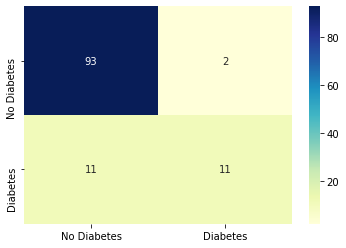

In [ ]:
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='YlGnBu')

Feature selection to see which variables that are important to used for prediction

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_rf_train, y_rf_train)

RandomForestClassifier(random_state=0)

In [ ]:
feature_scores = pd.Series(clf.feature_importances_, index=X_rf_train.columns).sort_values(ascending=False)
feature_scores

Glucose           0.698233
Chol/HDL ratio    0.178882
HDL Chol          0.109175
Gender            0.013710
dtype: float64

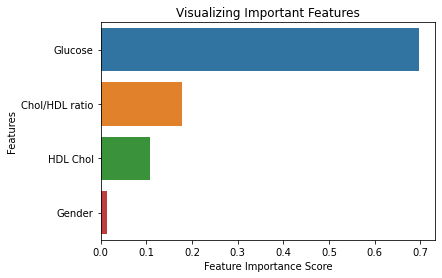

In [ ]:
sns.barplot(x=feature_scores, y=feature_scores.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

Reprocessing the data 30 times to make sure that the metric score and variable importance score are valid

In [ ]:
def split_rf(data):
    prec=0
    sens=0
    acc=0
    f1=0
    glucose=0
    chol_ratio=0
    hdl=0
    gender=0
    
    for i in range (30):
        X = data.drop(['Diabetes'], axis=1)
        y = data['Diabetes']
        X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size = 0.3)
        
        rfc = RandomForestClassifier(n_estimators=100,random_state=0)
        rfc.fit(X_rf_train, y_rf_train)
        RF=pd.DataFrame(rfc.predict(X_rf_test),columns=['Diabetes_Predicted_RF'])

        precision=metrics.precision_score(y_rf_test, RF['Diabetes_Predicted_RF'])
        prec+=precision
        sensitivity=metrics.recall_score(y_rf_test, RF['Diabetes_Predicted_RF'])
        sens+=sensitivity
        accuracy=metrics.accuracy_score(y_rf_test,RF['Diabetes_Predicted_RF'])
        acc+=accuracy
        f1_score=metrics.f1_score(y_rf_test, RF['Diabetes_Predicted_RF'])
        f1+=f1_score
        
        clf = RandomForestClassifier(n_estimators=100, random_state=0)
        clf.fit(X_rf_train, y_rf_train)
        
        feature_scores = pd.Series(clf.feature_importances_, index=X_rf_train.columns).sort_values(ascending=False)
        fs=pd.DataFrame(feature_scores)
        
        for i in range(len(fs)):
            if fs.index[i]=='Glucose':
                glucose+=fs.iloc[i][0]
            elif fs.index[i]=='Chol/HDL ratio':
                chol_ratio+=fs.iloc[i][0]
            elif fs.index[i]=='HDL Chol':
                hdl+=fs.iloc[i][0]
            else:
                gender+=fs.iloc[i][0]

    metric_array = np.array([['Accuracy_mean', acc/30],
                            ['Precision_mean', prec/30], ['Sensitivity_mean', sens/30],['F1 Score_mean', f1/30],
                            ['Glucose',glucose/30],['Chol/HDL ratio',chol_ratio/30],['HDL Chol',hdl/30],['Gender',gender/30]])
    metric_score = pd.DataFrame(metric_array, columns=['Metric_var', 'Score'])
    return(metric_score)

In [ ]:
rf_score = split_rf(data)
rf_score

,Metric_var,Score
0,Accuracy_mean,0.9011396011396013
1,Precision_mean,0.6939541349603272
2,Sensitivity_mean,0.590899268212332
3,F1 Score_mean,0.6279708859293726
4,Glucose,0.6629785614109384
5,Chol/HDL ratio,0.17878540659282263
6,HDL Chol,0.13413312931431173
7,Gender,0.024102902681927465


In [ ]:
rf_score = rf_score.iloc[:4]
rf_score

,Metric_var,Score
0,Accuracy_mean,0.9011396011396013
1,Precision_mean,0.6939541349603272
2,Sensitivity_mean,0.590899268212332
3,F1 Score_mean,0.6279708859293726


In [ ]:
rf_score.columns = ['Metric_mean', 'Score']

The F1 score from metric score above is still classified as good. For the variables that are used, we drop the variable below 10% importance variable score. Therefore, we drop `Gender`

Since we drop `Gender`, we will run Naive Bayes and Random Forest method one more time with just `Glucose`, `Chol/HDL ratio`, and `HDL Chol`

### Naive Bayes Without Gender

In [ ]:
X2 = data.drop(['Gender','Diabetes'], axis=1)
y2 = data['Diabetes']

In [ ]:
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state = 42)

In [ ]:
X2_train.shape, X2_test.shape

((273, 3), (117, 3))

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb2 = GaussianNB()
gnb2.fit(X2_train, y2_train)

GaussianNB()

In [ ]:
NB2=pd.DataFrame(gnb2.predict(X2_test),columns=['Diabetes_Predicted_NB'])
NB2.head()

,Diabetes_Predicted_NB
0,0
1,0
2,0
3,1
4,1


In [ ]:
metric_score(y2_test,NB2['Diabetes_Predicted_NB'])

,Metric,Score
0,Accuracy,0.8803418803418803
1,Precision,0.7272727272727273
2,Sensitivity,0.6666666666666666
3,F1 Score,0.6956521739130435


In [ ]:
y2_pred_train = gnb2.predict(X2_train)

In [ ]:
metric_score(y2_train,y2_pred_train)

,Metric,Score
0,Accuracy,0.9487179487179487
1,Precision,0.8666666666666667
2,Sensitivity,0.7222222222222222
3,F1 Score,0.7878787878787877


In [ ]:
cm2 = confusion_matrix(y2_test, NB2['Diabetes_Predicted_NB'])
cm_df2=pd.DataFrame(cm2,columns=['No Diabetes','Diabetes'],index=['No Diabetes', 'Diabetes'])
cm_df2

,No Diabetes,Diabetes
No Diabetes,87,6
Diabetes,8,16


<AxesSubplot:>

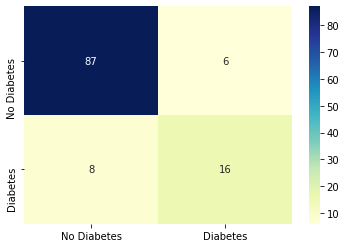

In [ ]:
sns.heatmap(cm_df2, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
def split2(data):
    prec=0
    sens=0
    acc=0
    f1=0
    
    for i in range (30):
        X2 = data.drop(['Gender','Diabetes'], axis=1)
        y2 = data['Diabetes']
        X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3)

        gnb2 = GaussianNB()
        gnb2.fit(X2_train, y2_train)

        NB2=pd.DataFrame(gnb2.predict(X2_test))
        NB2.columns=['Diabetes_Predicted_NB']

        precision=metrics.precision_score(y2_test, NB2['Diabetes_Predicted_NB'])
        prec+=precision
        sensitivity=metrics.recall_score(y2_test, NB2['Diabetes_Predicted_NB'])
        sens+=sensitivity
        accuracy=metrics.accuracy_score(y2_test,NB2['Diabetes_Predicted_NB'])
        acc+=accuracy
        f1_score=metrics.f1_score(y2_test, NB2['Diabetes_Predicted_NB'])
        f1+=f1_score

    metric_array = np.array([['Accuracy_mean', acc/30],
                                   ['Precision_mean', prec/30], ['Sensitivity_mean', sens/30],['F1 Score_mean', f1/30]])
    metric_score = pd.DataFrame(metric_array, columns=['Metric_mean', 'Score'])
    return(metric_score)

In [ ]:
NB2_score=split2(data)
NB2_score

,Metric_mean,Score
0,Accuracy_mean,0.9256410256410258
1,Precision_mean,0.8036528139043619
2,Sensitivity_mean,0.6660164261599514
3,F1 Score_mean,0.7229752114609453


### Random Forest Without Gender

In [ ]:
X2_rf = data.drop(['Gender','Diabetes'], axis=1)
y2_rf = data['Diabetes']

X2_rf_train, X2_rf_test, y2_rf_train, y2_rf_test = train_test_split(X2_rf, y2_rf, test_size = 0.3, random_state = 0)

In [ ]:
X2_rf_train.shape, X2_rf_test.shape

((273, 3), (117, 3))

In [ ]:
rfc2 = RandomForestClassifier(n_estimators=100,random_state=0)

In [ ]:
rfc2.fit(X2_rf_train, y2_rf_train)
RF2=pd.DataFrame(rfc2.predict(X2_rf_test),columns=['Diabetes_Predicted_RF'])
RF2.head()

,Diabetes_Predicted_RF
0,0
1,0
2,0
3,0
4,0


In [ ]:
metric_score(y2_rf_test,RF2['Diabetes_Predicted_RF'])

,Metric,Score
0,Accuracy,0.8888888888888888
1,Precision,0.8461538461538461
2,Sensitivity,0.5
3,F1 Score,0.6285714285714286


In [ ]:
rfc2.fit(X2_rf_train, y2_rf_train)
yrf2_pred_train = rfc2.predict(X2_rf_train)

In [ ]:
metric_score(y2_rf_train,yrf2_pred_train)

,Metric,Score
0,Accuracy,0.9963369963369964
1,Precision,1.0
2,Sensitivity,0.9736842105263158
3,F1 Score,0.9866666666666666


In [ ]:
cm_rf2 = confusion_matrix(y2_rf_test, RF2['Diabetes_Predicted_RF'])
cm_rf2=pd.DataFrame(cm_rf2,columns=['No Diabetes','Diabetes'],index=['No Diabetes', 'Diabetes'])
cm_rf2

,No Diabetes,Diabetes
No Diabetes,93,2
Diabetes,11,11


<AxesSubplot:>

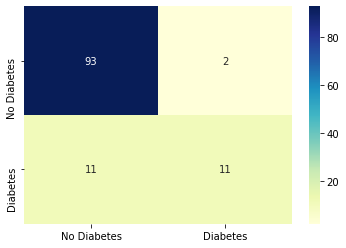

In [ ]:
sns.heatmap(cm_rf2, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
clf2 = RandomForestClassifier(n_estimators=100, random_state=0)
clf2.fit(X2_rf_train, y2_rf_train)

RandomForestClassifier(random_state=0)

In [ ]:
feature_scores2 = pd.Series(clf2.feature_importances_, index=X2_rf_train.columns).sort_values(ascending=False)
feature_scores2

Glucose           0.667656
Chol/HDL ratio    0.178133
HDL Chol          0.154211
dtype: float64

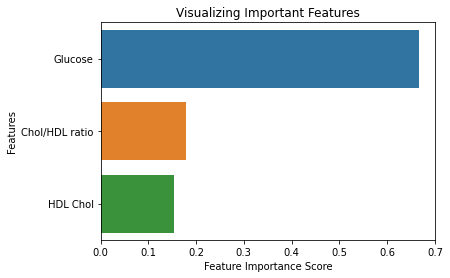

In [ ]:
sns.barplot(x=feature_scores2, y=feature_scores2.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [ ]:
def split_rf2(data):
    prec=0
    sens=0
    acc=0
    f1=0
    glucose=0
    chol_ratio=0
    hdl=0
    gender=0
    
    for i in range (30):
        X2_rf = data.drop(['Gender','Diabetes'], axis=1)
        y2_rf = data['Diabetes']
        X2_rf_train, X2_rf_test, y2_rf_train, y2_rf_test = train_test_split(X2_rf, y2_rf, test_size = 0.3)
        
        rfc2 = RandomForestClassifier(n_estimators=100,random_state=0)
        rfc2.fit(X2_rf_train, y2_rf_train)
        RF2=pd.DataFrame(rfc2.predict(X2_rf_test),columns=['Diabetes_Predicted_RF'])

        precision=metrics.precision_score(y2_rf_test, RF2['Diabetes_Predicted_RF'])
        prec+=precision
        sensitivity=metrics.recall_score(y2_rf_test, RF2['Diabetes_Predicted_RF'])
        sens+=sensitivity
        accuracy=metrics.accuracy_score(y2_rf_test,RF2['Diabetes_Predicted_RF'])
        acc+=accuracy
        f1_score=metrics.f1_score(y2_rf_test, RF2['Diabetes_Predicted_RF'])
        f1+=f1_score
        
        clf2 = RandomForestClassifier(n_estimators=100, random_state=0)
        clf2.fit(X2_rf_train, y2_rf_train)
        
        feature_scores2 = pd.Series(clf2.feature_importances_, index=X2_rf_train.columns).sort_values(ascending=False)
        fs2=pd.DataFrame(feature_scores2)
        
        for i in range(len(fs2)):
            if fs2.index[i]=='Glucose':
                glucose+=fs2.iloc[i][0]
            elif fs2.index[i]=='Chol/HDL ratio':
                chol_ratio+=fs2.iloc[i][0]
            else: 
                hdl+=fs2.iloc[i][0]


    metric_array = np.array([['Accuracy_mean', acc/30],
                            ['Precision_mean', prec/30], ['Sensitivity_mean', sens/30],['F1 Score_mean', f1/30],
                            ['Glucose',glucose/30],['Chol/HDL ratio',chol_ratio/30],['HDL Chol',hdl/30]])
    metric_score = pd.DataFrame(metric_array, columns=['Metric_var', 'Score'])
    return(metric_score)

In [ ]:
rf2_score = split_rf2(data)
rf2_score

,Metric_var,Score
0,Accuracy_mean,0.9065527065527068
1,Precision_mean,0.7560474100489581
2,Sensitivity_mean,0.5994157301384048
3,F1 Score_mean,0.6608544110040364
4,Glucose,0.6092120725480153
5,Chol/HDL ratio,0.20724805407930896
6,HDL Chol,0.18353987337267588


In [ ]:
rf2_score = rf2_score.iloc[:4]
rf2_score

,Metric_var,Score
0,Accuracy_mean,0.9065527065527068
1,Precision_mean,0.7560474100489581
2,Sensitivity_mean,0.5994157301384048
3,F1 Score_mean,0.6608544110040364


In [ ]:
rf2_score.columns = ['Metric_mean', 'Score']

In [ ]:
frames = [NB_score, NB2_score, rf_score, rf2_score]
result = pd.concat(frames)

In [ ]:
result

,Metric_mean,Score
0,Accuracy_mean,0.9202279202279204
1,Precision_mean,0.7782586246169836
2,Sensitivity_mean,0.6660289119230428
3,F1 Score_mean,0.7121008449653897
0,Accuracy_mean,0.9256410256410258
1,Precision_mean,0.8036528139043619
2,Sensitivity_mean,0.6660164261599514
3,F1 Score_mean,0.7229752114609453
0,Accuracy_mean,0.9011396011396013
1,Precision_mean,0.6939541349603272


In [ ]:
result['Model']=['Naive Bayes', 'Naive Bayes', 'Naive Bayes', 'Naive Bayes',
                'Naive Bayes (No Gender)', 'Naive Bayes (No Gender)','Naive Bayes (No Gender)','Naive Bayes (No Gender)',
                'Random Forest', 'Random Forest', 'Random Forest', 'Random Forest',
                'Random Forest (No Gender)', 'Random Forest (No Gender)', 'Random Forest (No Gender)', 'Random Forest (No Gender)']
result2 = result.groupby(['Model', 'Metric_mean']).sum()

In [ ]:
result2

Score
Model                     Metric_mean                         
Naive Bayes               Accuracy_mean     0.9202279202279204
                          F1 Score_mean     0.7121008449653897
                          Precision_mean    0.7782586246169836
                          Sensitivity_mean  0.6660289119230428
Naive Bayes (No Gender)   Accuracy_mean     0.9256410256410258
                          F1 Score_mean     0.7229752114609453
                          Precision_mean    0.8036528139043619
                          Sensitivity_mean  0.6660164261599514
Random Forest             Accuracy_mean     0.9011396011396013
                          F1 Score_mean     0.6279708859293726
                          Precision_mean    0.6939541349603272
                          Sensitivity_mean   0.590899268212332
Random Forest (No Gender) Accuracy_mean     0.9065527065527068
                          F1 Score_mean     0.6608544110040364
                          Precision_mean    0.7560474100489581
                          Sensitivity_mean  0.5994157301384048

Basically, to select the best model we need to take a look at model with the highest F1 score. In this case, Naive Bayes without gender have the highest F1 score. Since, we need to select the simplest model as the best, we will choose Naive Bayes without gender model.

In [ ]:
data_us = data.groupby(['Diabetes'])[['Glucose', 'HDL Chol', 'Chol/HDL ratio']].agg(['min', 'max', 'mean'])

In [ ]:
data_us

Glucose                  HDL Chol                 Chol/HDL ratio  \
             min  max        mean      min  max       mean            min   
Diabetes                                                                    
0             48  371   91.551515       12  120  51.172727            1.5   
1             60  385  194.166667       23  114  45.283333            2.0   

                          
           max      mean  
Diabetes                  
0         10.6  4.322727  
1         19.3  5.635000

After we select the variables that are needed for modeling, we tried to find the characteristics of diabetics and non diabetics. Based on the table above, we conclude that diabetics have the average glucose value of 194.16, HDL chol with value of 45.28, Chol/HDL ratio of 5.63. While non diabetics have the average glucose value of 91.55, HDL chol value of 51.17, and Chol/HDL ratio value of 4.32. This was supported by Mayoclinic, whereas non diabetics have glucose value lower than 140mg/dL. While for diabetics, 140-199mg/dL indicates pre-diabetes. Higher HDL chol reduces the risk of diabetes, while lower HDL chol indicates otherwise. And finally if bad cholestrol is higher than good cholesterol (HDL), it will potentially makes diabetes risk higher.